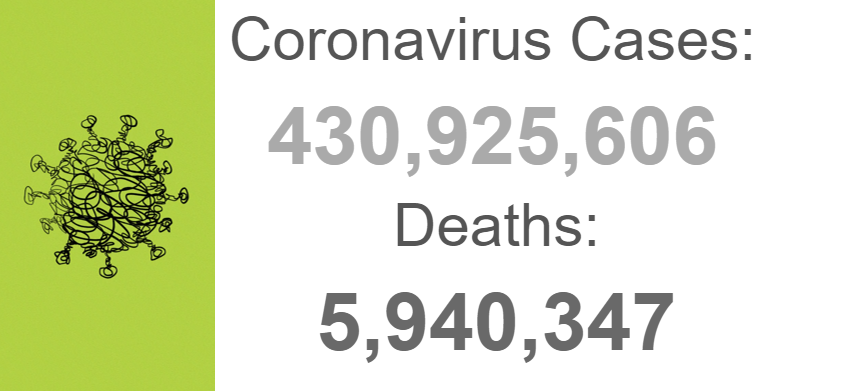

#  <font color='green'> Introduction: </font>
The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic. The World Health Organization (WHO) declared a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March 2020. As of 20 February 2022, the pandemic had caused more than 423 million cases and 5.88 million deaths, making it one of the deadliest in history.

We were looking for an interesting and relevant topic for the project and what is more interesting than the corona which has been an integral part of our lives for more than two years.

In this project we gathered worldwide data about the corona pandemic from various sources in order to build a model. Using what we have learnd in class (and with a "little" help from the internet), this model will eventually predict the number of deaths caused by the corona virus in each country.


###  <font color='green'> Our data: </font>
We have data from about 226 Countries and we use them to build our model. Some of the columns in the data are irrelevant for this model, thus, we will list below the main columns and later on we will expalin our steps in building the best possible model.

####  <font color='green'> Columns: </font>
  - "vaccenatedPercent" : The percentage of vaccinated people for covid-19 per country (at least one dose).
  - "TotCases1MPop" : The number people infected with covid-19 per million people in the country.
  - "TotalRecovered1MPop" : The numbers of recovered patients from covid-19 per million people in the country.
  - "Critical1MPop" : The numbers of patients in critical condition from covid-19 per million people in the country.
  - "Tests1MPop" : The numbers of covid-19 Tests performed per million people in the country.
  - "Population" : The population count.
  - "ActiveCases1MPop" : The numbers of active cases of covid-19 per million people in the country.
  
####  <font color='green'> The column we want to predict: </font>  
  - "Deaths1MPop" : The numbers of deaths caused by covid-19 per million people in the country.





# resoltsts from our first project

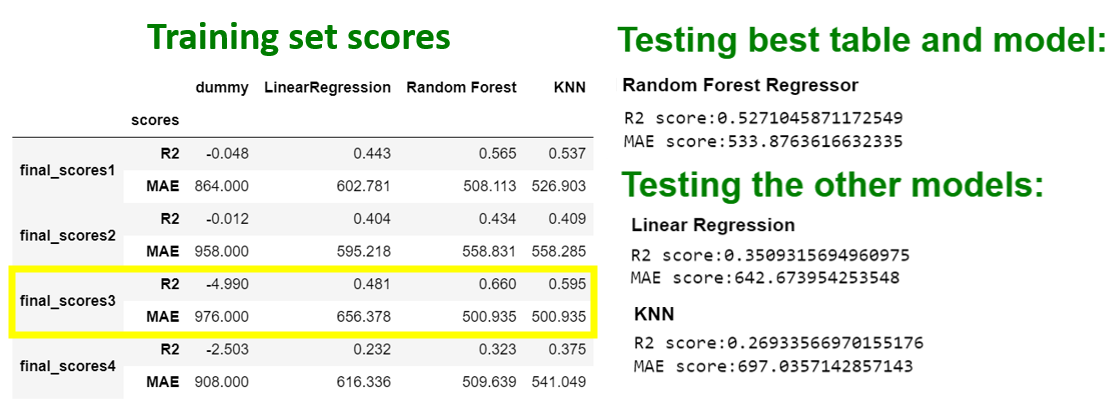

In [2]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [3]:
df_korona = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\df_best_korona.csv", sep='\t')

In [3]:
df_korona.head()

,Unnamed: 0,vaccenatedPresent,ActiveCases1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop
0,0,64.7,7138.316850,341089.0,1711.0,5614985.0
1,1,66.7,2327.470624,280012.0,4157.0,2671934.0
2,2,62.3,1155.475969,278719.0,3794.0,2290890.0
3,3,82.0,9291.884185,240541.0,2314.0,4189935.0
4,4,74.0,10057.241728,247337.0,2310.0,3089878.0


### Using groupby to learn a little about our data

#### Looking for correlation between the vaccenated percentage and the number of deaths

In [32]:
new_df = df_korona.copy()
new_df["vaccenated_percentage"]= "0-20%"
new_df.loc[(new_df.vaccenatedPresent>20)&(new_df.vaccenatedPresent<40),"vaccenated_percentage"] ="20-40%"
new_df.loc[(new_df.vaccenatedPresent>40)&(new_df.vaccenatedPresent<60),"vaccenated_percentage"] ="40-60%"
new_df.loc[(new_df.vaccenatedPresent>60)&(new_df.vaccenatedPresent<80),"vaccenated_percentage"] ="60-80%"
new_df.loc[(new_df.vaccenatedPresent>80),"vaccenated_percentage" ] ="80-100%"
new_df.vaccenated_percentage.value_counts()

60-80%     87
80-100%    42
40-60%     38
20-40%     26
0-20%      23
Name: vaccenated_percentage, dtype: int64

In [33]:
new_df.groupby("vaccenated_percentage").Deaths1MPop.mean()

vaccenated_percentage
0-20%       156.173913
20-40%      965.961538
40-60%     1759.105263
60-80%     2013.425287
80-100%    1543.738095
Name: Deaths1MPop, dtype: float64

#### We got surprising results, our hypothesis was that a higher percentage of vaccenated will reduce the number of death but we got the opposites results.

#### Looking for correlation between the number of tests and the number of deaths

In [44]:
new_df["tests"]= "0-200000"
new_df.loc[(new_df.Tests1MPop>200000)&(new_df.Tests1MPop<400000),"tests"] ="200000-400000"
new_df.loc[(new_df.Tests1MPop>400000)&(new_df.Tests1MPop<600000),"tests"] ="400000-600000"
new_df.loc[(new_df.Tests1MPop>600000)&(new_df.Tests1MPop<800000),"tests"] ="600000-800000"
new_df.loc[(new_df.Tests1MPop>800000),"tests" ] ="800000-100000"
new_df.tests.value_counts()

800000-100000    123
0-200000          49
200000-400000     22
600000-800000     14
400000-600000      8
Name: tests, dtype: int64

In [45]:
new_df.groupby("tests").Deaths1MPop.mean()

tests
0-200000          213.367347
200000-400000     960.318182
400000-600000    1171.875000
600000-800000    1385.428571
800000-100000    2237.439024
Name: Deaths1MPop, dtype: float64

#### This time we got the results as we expected. A higher number of test means a country with a a higher death rate.

In [46]:
df = new_df.groupby(["tests","vaccenated_percentage"]).Deaths1MPop.mean().sort_values(ascending = False)

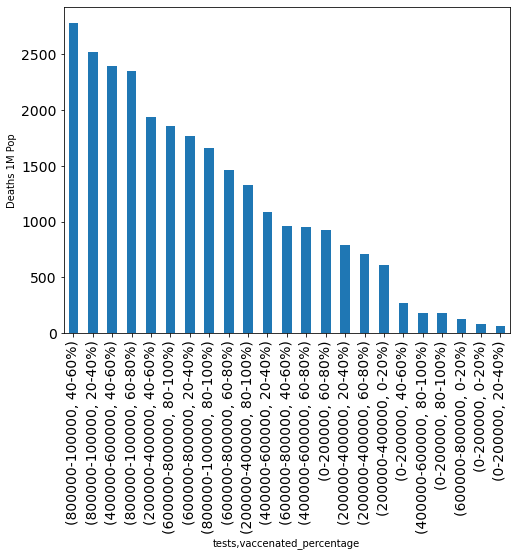

In [47]:
df.plot(kind = "bar",figsize = (8,6),fontsize = 14)
plt.ylabel("Deaths 1M Pop")
plt.show()

#### We can see from this that the countries with vaccenated percentage in the "0-20%" ,and number of tests in "0-200000" have the lowest death rate. But the group in the table that is with vaccenated percentage in the "80-100%" and number of tests in "400000-600000" also have a low death rate.
### We anderstand from this graph that our data is composed of many factors that are not necessarily present in our data

### Train test split

In [4]:
X = df_korona.drop("Deaths1MPop", axis=1)
y = df_korona["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

### scaling the data

In [4]:
scaler1 = StandardScaler()

X_train = scaler1.fit_transform(X_train)
X_test = scaler1.fit_transform(X_test)


### DummyRegressor

In [33]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R2 score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R2 score is -0.170
our dummy mean absolute error is 1142


### Support Vector Regression (SVR) using linear and non-linear kernels

In [56]:
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3)

### Linear kernel

In [58]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(svr_lin, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
y_predict = cross_val_predict(svr_lin, X_train, y_train, cv=kf)
mae = MAE(y_train,y_predict)
print(scores.mean())
print(mae)

0.4048314126327508
715.2719787867059


### Polynomial kernel

In [59]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(svr_poly, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
y_predict = cross_val_predict(svr_poly, X_train, y_train, cv=kf)
mae = MAE(y_train,y_predict)
print(scores.mean())
print(mae)

0.5377641578997086
600.6203759005602


### AdaBoostRegressor

In [36]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
regr = AdaBoostRegressor(random_state=0, n_estimators=300,loss ='square', learning_rate=0.1 )
scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
y_predict = cross_val_predict(regr, X_train, y_train, cv=kf)
mae = MAE(y_train,y_predict)
print(scores.mean())
print(mae)


0.6741605586642022
533.5202327770284


### Random Forest Regressor

In [9]:
RFR = RandomForestRegressor(n_estimators =36,min_samples_split = 10,min_samples_leaf = 4,max_features ='sqrt',max_depth = 20,bootstrap = True)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
R2 = cross_val_score(RFR, X_train, y_train, cv=kf, scoring='r2')
y_predict = cross_val_predict(RFR, X_train, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict)
print("R2 score:" +(str)(R2.mean()))
print("MAE score:" +(str)(mae_standarsized))


R2 score:0.6533179060857325
MAE score:525.5191595822072


### Voting Regressor

In [66]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators =36,min_samples_split = 10,min_samples_leaf = 4,max_features ='sqrt',max_depth = 20,bootstrap = True)
r3 = KNeighborsRegressor()

In [67]:
voting = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
kf = model_selection.KFold(n_splits=10, random_state=2, shuffle=True)
scores = model_selection.cross_val_score(voting, X_train, y_train, cv=kf, scoring= 'r2')
y_predict = cross_val_predict(voting, X_train, y_train, cv=kf)
mae = MAE(y_train,y_predict)
print(scores.mean())
print(mae)

0.6105661575180169
592.0968207969673


### Gradient Boost

In [68]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.1,
}

In [70]:
reg = GradientBoostingRegressor(**params)
scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
y_predict = cross_val_predict(reg, X_train, y_train, cv=kf)
mae = MAE(y_train,y_predict)
print(scores.mean())
print(mae)

0.621465414001692
566.4647060464566


## looking at all scores

In [9]:
data  = {'scores' :['R2','MAE'],
         'dummy':[-1.17, 1142],
        'SVR - linear':[0.404, 715],
         'SVR - poly': [0.537,600],
        'adaboost': [0.674,533],
        'voting': [0.61,592],
        'gardient-boost': [0.62,566]}

data = pd.DataFrame(data) 
final_scores = data.set_index('scores')
final_scores

,dummy,SVR - linear,SVR - poly,adaboost,voting,gardient-boost
scores,,,,,,
R2,-1.17,0.404,0.537,0.674,0.61,0.62
MAE,1142.00,715.000,600.000,533.000,592.00,566.00


### Before testing...

We can clearly see that the models that work based on Ensemble Learning bring much better scores than the other models, we asume that also in the test results the scores will be better because of a special feature of Ensemble Learing which is the preventing  over-fitting, and that is very important especially with a very small data set like ours.

In the project last semester we got a good score of 0.66 from the Random Forest model which is itself based on Ensemble Learning, in this project we ran more models based on Ensemble and got a slightly better score = 0.67 from the Adabost model.

although it is not much of a difference we hope that at the test resolts we will get a better score then our project last semester 0.527

# Testing our best model - AdaBoost Regressor

In [6]:
regr = AdaBoostRegressor(random_state=0, n_estimators=300,loss ='square', learning_rate=0.1 )

regr.fit(X_train, y_train)
R2_score = regr.score(X_test, y_test)
y_predict = regr.predict(X_test)
mae_score = MAE(y_test, y_predict)

print("R2 score:" +(str)(R2_score))
print("MAE score:" +(str)(mae_score))

R2 score:0.5309446984219373
MAE score:665.1805350065163


### last semesret score - Random Forest Regressor

In [10]:
print("R2 score:" +(str)(0.527))
print("MAE score:" +(str)(533.876))

R2 score:0.527
MAE score:533.876


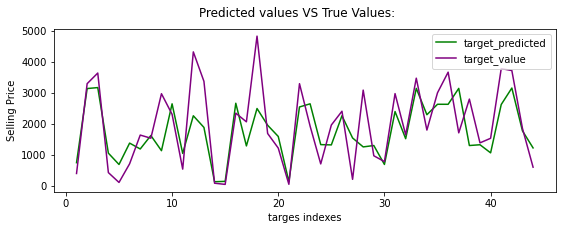

In [7]:
y_predict = regr.predict(X_test)
indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='green')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

# Summary and Conclusions

- In the test result we received lower accuracy score from the train set.

- We got a slitly better R2 score but worst MAE score then in last semester

- We saw that even when we are working with models that dont support over-fitting, sometims the data is so small that even the best model preform badly at the test resolt.

- if we would wanted to improve our model  it should be done by bringing more data and not by training more models because that is what we tryed to do and we did not see any significant improvement.